In [143]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')
%matplotlib inline

In [29]:
df = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
df.shape

(1338, 7)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [34]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [35]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [36]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [37]:
df = pd.get_dummies(df)

In [38]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [39]:
df.shape

(1338, 12)

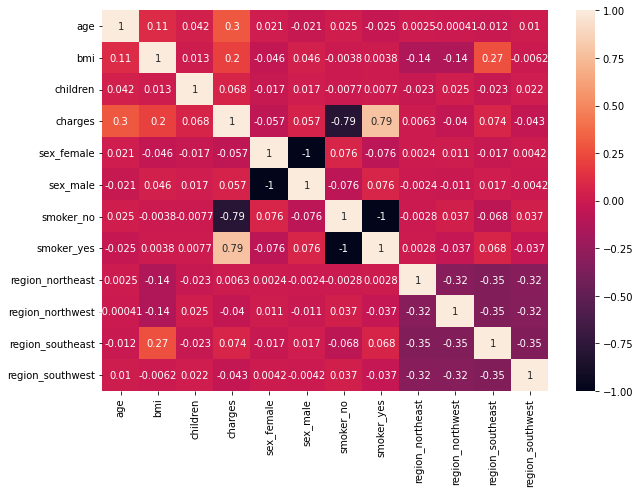

In [40]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True);

In [59]:
x = df[['age', 'bmi', 'smoker_yes']]
y = df["charges"]

In [60]:
x.head()

,age,bmi,smoker_yes
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0


In [61]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [105]:
scaler = StandardScaler()

In [106]:
x_scaled_values = scaler.fit_transform(x.values)

In [107]:
x_scaled = pd.DataFrame(x_scaled_values, columns=x.columns)

In [108]:
x_scaled

,age,bmi,smoker_yes
0,-1.438764,-0.453320,1.970587
1,-1.509965,0.509621,-0.507463
2,-0.797954,0.383307,-0.507463
3,-0.441948,-1.305531,-0.507463
4,-0.513149,-0.292556,-0.507463
...,...,...,...
1333,0.768473,0.050297,-0.507463
1334,-1.509965,0.206139,-0.507463
1335,-1.509965,1.014878,-0.507463
1336,-1.296362,-0.797813,-0.507463


In [109]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

In [110]:
x_train.shape

(1070, 3)

In [111]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(3))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu')) 
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [112]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 512)               2048      
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 176,641
Trainable params: 176,641
Non-tr

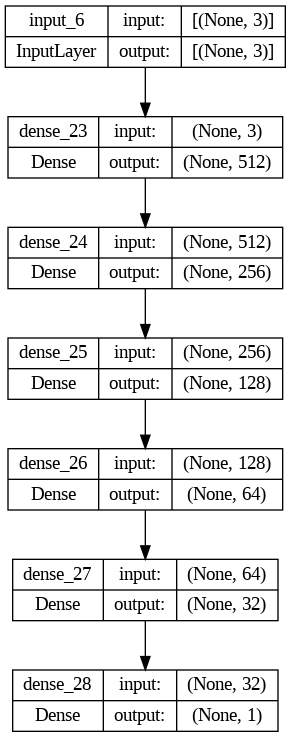

In [113]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [114]:
tf.random.set_seed(42)
history = model.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

Epoch 1/300
34/34 [==============================] - 2s 11ms/step - loss: 12994.1494 - mae: 12994.1494 - val_loss: 14163.3496 - val_mae: 14163.3496
Epoch 2/300
34/34 [==============================] - 0s 5ms/step - loss: 11403.9951 - mae: 11403.9951 - val_loss: 9029.3613 - val_mae: 9029.3613
Epoch 3/300
34/34 [==============================] - 0s 5ms/step - loss: 5730.7871 - mae: 5730.7871 - val_loss: 4854.3491 - val_mae: 4854.3491
Epoch 4/300
34/34 [==============================] - 0s 6ms/step - loss: 4065.0552 - mae: 4065.0552 - val_loss: 4443.7822 - val_mae: 4443.7822
Epoch 5/300
34/34 [==============================] - 0s 5ms/step - loss: 3627.4578 - mae: 3627.4578 - val_loss: 4104.6660 - val_mae: 4104.6660
Epoch 6/300
34/34 [==============================] - 0s 5ms/step - loss: 3220.6311 - mae: 3220.6311 - val_loss: 3857.3018 - val_mae: 3857.3018
Epoch 7/300
34/34 [==============================] - 0s 5ms/step - loss: 3059.1606 - mae: 3059.1606 - val_loss: 3731.5791 - val_mae: 37

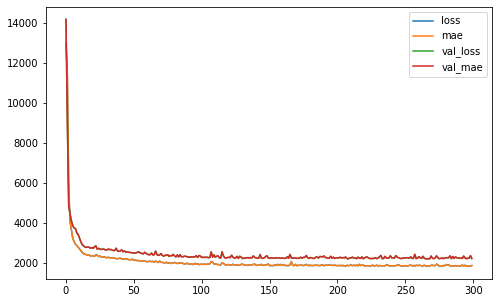

In [115]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [116]:
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 2216.6152 - mae: 2216.6152


[2216.615234375, 2216.615234375]

In [141]:
y_pred = model.predict(x_test)

9/9 [==============================] - 0s 2ms/step


In [144]:
mean_absolute_error(y_test, y_pred)

2216.615354734579